In [1]:
import numpy as np
from qiskit import QuantumCircuit

# Создаем квантовую схему с помощью конструктора `QuantumCircuit`. Добавляем гейты для создания суперпозиции $(|000\rangle + i|111\rangle)/\sqrt{2}$
qc_example = QuantumCircuit(3)
qc_example.h(0)          # generate superpostion
qc_example.p(np.pi/2,0)  # add quantum phase
qc_example.cx(0,1)       # 0th-qubit-Controlled-NOT gate on 1st qubit
qc_example.cx(0,2)       # 0th-qubit-Controlled-NOT gate on 2nd qubit

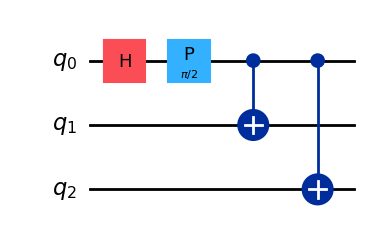

In [2]:
# Отображаем квантовую схему в виде диаграммы.
qc_example.draw("mpl")

In [3]:
# Запускаем схему с помощью `Sampler` и замеряем результаты.
qc_measured = qc_example.measure_all(inplace=False)

from qiskit.primitives.sampler import Sampler
sampler = Sampler()
job = sampler.run(qc_measured, shots=1000)
result = job.result()
print(f" > Quasi probability distribution: {result.quasi_dists}")

 > Quasi probability distribution: [{0: np.float64(0.481), 7: np.float64(0.519)}]


C:\Users\nikit\AppData\Local\Temp\ipykernel_17452\1493673688.py:6: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


In [4]:
# Применяем оператор к выходным значениям.
from qiskit.quantum_info import SparsePauliOp
operator = SparsePauliOp.from_list([("XXY", 1), ("XYX", 1), ("YXX", 1), ("YYY", -1)])

# 3. Execute using the Estimator primitive
from qiskit.primitives import Estimator
estimator = Estimator()
job = estimator.run(qc_example, operator, shots=1000)
result = job.result()
print(f" > Expectation values: {result.values}")

 > Expectation values: [4.]


C:\Users\nikit\AppData\Local\Temp\ipykernel_17452\3122182656.py:7: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()
